<a href="https://colab.research.google.com/github/thai94/d2l/blob/main/10.attention_mechanisms/10_2_attention_pooling_nadaraya_watson_kernel_regression_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [ ]:
n_train = 50
x_train, _ = torch.sort(torch.rand(n_train) * 5)

In [ ]:
x_train[0:10]

tensor([0.0086, 0.0570, 0.1215, 0.1240, 0.1742, 0.4642, 0.4758, 0.6877, 0.8254,
        1.0354])

In [ ]:
def f(x):
  return 2 * torch.sin(x) + x**0.8

y_train = f(x_train) + torch.normal(0.0, 0.5, (n_train,))
x_test = torch.arange(0, 5, 0.1)
y_truth = f(x_test)

n_test = len(x_test)
n_test

50

In [ ]:
def plot_kernel_reg(y_hat):
    plt.plot(x_test, y_truth, label='Truth')
    plt.plot(x_test, y_hat, label='Pred')
    plt.plot(x_train, y_train, 'o', alpha=0.5, label='Train');
    plt.legend()

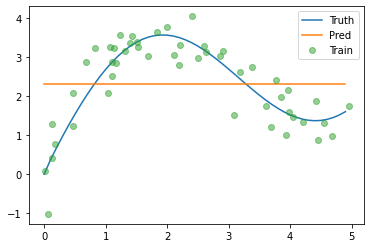

In [ ]:
y_hat = torch.repeat_interleave(y_train.mean(), n_test)
plot_kernel_reg(y_hat)

In [ ]:
X_repeat = x_test.repeat_interleave(n_train).reshape((-1, n_train))
X_repeat

tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.1000, 0.1000, 0.1000,  ..., 0.1000, 0.1000, 0.1000],
        [0.2000, 0.2000, 0.2000,  ..., 0.2000, 0.2000, 0.2000],
        ...,
        [4.7000, 4.7000, 4.7000,  ..., 4.7000, 4.7000, 4.7000],
        [4.8000, 4.8000, 4.8000,  ..., 4.8000, 4.8000, 4.8000],
        [4.9000, 4.9000, 4.9000,  ..., 4.9000, 4.9000, 4.9000]])

In [ ]:
x_train

tensor([0.0086, 0.0570, 0.1215, 0.1240, 0.1742, 0.4642, 0.4758, 0.6877, 0.8254,
        1.0354, 1.0670, 1.1041, 1.1074, 1.1287, 1.1727, 1.2288, 1.3145, 1.3891,
        1.4349, 1.5050, 1.5209, 1.6845, 1.8358, 2.0022, 2.1086, 2.1872, 2.2110,
        2.3974, 2.5096, 2.5913, 2.6254, 2.8547, 2.9162, 3.0923, 3.1924, 3.3861,
        3.6086, 3.6882, 3.7783, 3.8458, 3.9294, 3.9733, 3.9864, 4.0475, 4.2016,
        4.4271, 4.4612, 4.5528, 4.6774, 4.9498])

In [ ]:
attention_weights = nn.functional.softmax(-(X_repeat - x_train)**2 / 2, dim=1)
attention_weights.shape

torch.Size([50, 50])

In [ ]:
attention_weights[0]

tensor([6.7275e-02, 6.7168e-02, 6.6782e-02, 6.6762e-02, 6.6265e-02, 6.0405e-02,
        6.0078e-02, 5.3110e-02, 4.7857e-02, 3.9362e-02, 3.8077e-02, 3.6572e-02,
        3.6438e-02, 3.5582e-02, 3.3827e-02, 3.1621e-02, 2.8357e-02, 2.5635e-02,
        2.4032e-02, 2.1679e-02, 2.1164e-02, 1.6282e-02, 1.2474e-02, 9.0643e-03,
        7.2845e-03, 6.1531e-03, 5.8385e-03, 3.8006e-03, 2.8856e-03, 2.3428e-03,
        2.1433e-03, 1.1436e-03, 9.5776e-04, 5.6420e-04, 4.1188e-04, 2.1786e-04,
        1.0004e-04, 7.4833e-05, 5.3447e-05, 4.1329e-05, 2.9857e-05, 2.5104e-05,
        2.3832e-05, 1.8642e-05, 9.8719e-06, 3.7319e-06, 3.2067e-06, 2.1230e-06,
        1.1941e-06, 3.2182e-07])

In [ ]:
attention_weights[1]

tensor([6.2238e-02, 6.2441e-02, 6.2484e-02, 6.2481e-02, 6.2327e-02, 5.8487e-02,
        5.8238e-02, 5.2586e-02, 4.8041e-02, 4.0353e-02, 3.9159e-02, 3.7751e-02,
        3.7625e-02, 3.6820e-02, 3.5158e-02, 3.3050e-02, 2.9894e-02, 2.7227e-02,
        2.5641e-02, 2.3293e-02, 2.2776e-02, 1.7811e-02, 1.3854e-02, 1.0236e-02,
        8.3139e-03, 7.0780e-03, 6.7322e-03, 4.4648e-03, 3.4281e-03, 2.8061e-03,
        2.5759e-03, 1.4063e-03, 1.1850e-03, 7.1049e-04, 5.2389e-04, 2.8253e-04,
        1.3266e-04, 1.0002e-04, 7.2084e-05, 5.6118e-05, 4.0881e-05, 3.4524e-05,
        3.2818e-05, 2.5829e-05, 1.3890e-05, 5.3706e-06, 4.6305e-06, 3.0938e-06,
        1.7619e-06, 4.8798e-07])

In [ ]:
y_hat = torch.matmul(attention_weights, y_train)

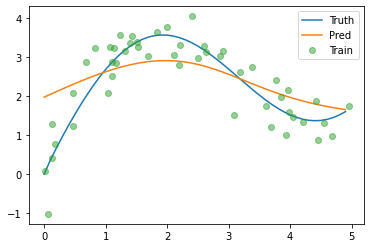

In [ ]:
plot_kernel_reg(y_hat)

In [ ]:
torch.rand((1,))

tensor([0.0671])

In [ ]:
class NWKernelRegression(nn.Module):

  def __init__(self, **kwargs):
    super().__init__(**kwargs)
    self.w = nn.Parameter(torch.rand((1,), requires_grad=True))
  
  def forward(self, queries, keys, values):

    queries = queries.repeat_interleave(keys.shape[1]).reshape((-1, keys.shape[1]))
    self.attention_weights = nn.functional.softmax(-((queries - keys) * self.w)**2 / 2, dim=1)
    return torch.bmm(self.attention_weights.unsqueeze(1), values.unsqueeze(-1)).reshape(-1)

In [ ]:
X_tile = x_train.repeat((n_train, 1))
Y_tile = y_train.repeat((n_train, 1))
keys = X_tile[(1 - torch.eye(n_train)).type(torch.bool)].reshape((n_train, -1))
values = Y_tile[(1 - torch.eye(n_train)).type(torch.bool)].reshape((n_train, -1))

In [ ]:
net = NWKernelRegression()
loss = nn.MSELoss(reduction='none')
trainer = torch.optim.SGD(net.parameters(), lr=0.5)

epoch 1, loss 58.410706
epoch 2, loss 17.785561
epoch 3, loss 17.770006
epoch 4, loss 17.754431
epoch 5, loss 17.738857


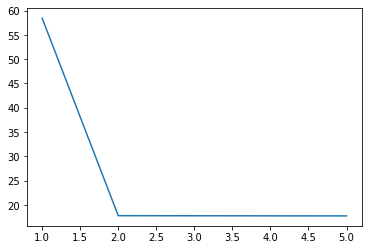

In [ ]:
x_ui = []
y_ui = []
for epoch in range(5):
  trainer.zero_grad()
  l = loss(net(x_train, keys, values), y_train)
  l.sum().backward()
  trainer.step()
  print(f'epoch {epoch + 1}, loss {float(l.sum()):.6f}')
  x_ui.append(epoch + 1)
  y_ui.append(float(l.sum()))

plt.plot(x_ui, y_ui)

In [ ]:
keys = x_train.repeat((n_test, 1))
values = y_train.repeat((n_test, 1))
y_hat = net(torch.tensor([50]), keys, values).unsqueeze(1).detach()

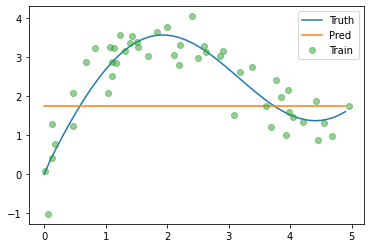

In [ ]:
plot_kernel_reg(y_hat)

In [ ]:
net.attention_weights

tensor([[4.4490e-01, 3.2628e-01, 1.0586e-01,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [1.1755e-01, 2.2188e-01, 2.5402e-01,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [1.2585e-02, 6.1142e-02, 2.4700e-01,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        ...,
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 1.1153e-01, 8.8220e-01,
         2.0880e-03],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 7.3991e-03, 6.6875e-01,
         3.2381e-01],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 9.6778e-06, 9.9941e-03,
         9.9000e-01]], grad_fn=<SoftmaxBackward0>)